In [1]:
import sys
from pathlib import Path

module_path = str(Path.cwd().parents[0])

if module_path not in sys.path:
    sys.path.append(module_path)

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

df = pd.read_csv('../data/processed/HotelReservationsLabelP.csv')
df.head(1)

,label_avg_price_per_room,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,no_of_special_requests,no_total_people,no_total_nights,season_group
0,1,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,0,2,3,Autumn


In [11]:
from scripts import data_preprocess
# Definir a coluna alvo
target_column = 'label_avg_price_per_room'

# Pré-processamento dos dados
preprocessor, X, y = data_preprocess.preprocess(df, target_column)

# Dividir os dados em conjuntos de treinamento e teste
y = y-1
preprocessor

ColumnTransformer(transformers=[('num', 'passthrough',
                                 Index(['no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights', 'required_car_parking_space', 'lead_time',
       'arrival_year', 'arrival_month', 'arrival_date', 'repeated_guest',
       'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled',
       'no_of_special_requests', 'no_total_people', 'no_total_nights'],
      dtype='object')),
                                ('cat', OneHotEncoder(handle_unknown='ignore'),
                                 Index(['type_of_meal_plan', 'room_type_reserved', 'market_segment_type',
       'season_group'],
      dtype='object'))])

In [12]:
X

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,no_of_special_requests,no_total_people,no_total_nights,season_group
0,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,0,2,3,Autumn
1,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,1,2,5,Autumn
2,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,0,1,3,Winter
3,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,0,2,2,Spring
4,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,0,2,2,Spring
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36270,3,0,2,6,Meal Plan 1,0,Room_Type 4,85,2018,8,3,Online,0,0,0,1,3,8,Summer
36271,2,0,1,3,Meal Plan 1,0,Room_Type 1,228,2018,10,17,Online,0,0,0,2,2,4,Autumn
36272,2,0,2,6,Meal Plan 1,0,Room_Type 1,148,2018,7,1,Online,0,0,0,2,2,8,Summer
36273,2,0,0,3,Not Selected,0,Room_Type 1,63,2018,4,21,Online,0,0,0,0,2,3,Spring


In [13]:
y

0        0
1        1
2        0
3        1
4        1
        ..
36270    2
36271    1
36272    1
36273    1
36274    2
Name: label_avg_price_per_room, Length: 36275, dtype: int64

In [14]:
X_prep = preprocessor.fit_transform(X)
X_prep

array([[2., 0., 1., ..., 0., 0., 0.],
       [2., 0., 2., ..., 0., 0., 0.],
       [1., 0., 2., ..., 0., 0., 1.],
       ...,
       [2., 0., 2., ..., 0., 1., 0.],
       [2., 0., 0., ..., 1., 0., 0.],
       [2., 0., 1., ..., 0., 0., 1.]])

In [15]:
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X.select_dtypes(include=['object']).columns
categorical_feature_names = preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_features)

feature_names = list(numeric_features) + list(categorical_feature_names)
X_df = pd.DataFrame(X_prep, columns=feature_names)
X_df

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,arrival_year,arrival_month,arrival_date,repeated_guest,...,room_type_reserved_Room_Type 7,market_segment_type_Aviation,market_segment_type_Complementary,market_segment_type_Corporate,market_segment_type_Offline,market_segment_type_Online,season_group_Autumn,season_group_Spring,season_group_Summer,season_group_Winter
0,2.0,0.0,1.0,2.0,0.0,224.0,2017.0,10.0,2.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
1,2.0,0.0,2.0,3.0,0.0,5.0,2018.0,11.0,6.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
2,1.0,0.0,2.0,1.0,0.0,1.0,2018.0,2.0,28.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,2.0,0.0,0.0,2.0,0.0,211.0,2018.0,5.0,20.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
4,2.0,0.0,1.0,1.0,0.0,48.0,2018.0,4.0,11.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36270,3.0,0.0,2.0,6.0,0.0,85.0,2018.0,8.0,3.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
36271,2.0,0.0,1.0,3.0,0.0,228.0,2018.0,10.0,17.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
36272,2.0,0.0,2.0,6.0,0.0,148.0,2018.0,7.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
36273,2.0,0.0,0.0,3.0,0.0,63.0,2018.0,4.0,21.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0


In [16]:
from sklearn.model_selection import train_test_split
from scripts import data_oversampler

X_train, X_test, y_train, y_test = train_test_split(X_df, y, test_size=0.2, random_state=42)

X_resampled, y_resampled = data_oversampler.oversample(X_train, y_train)
X_resampled

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,arrival_year,arrival_month,arrival_date,repeated_guest,...,room_type_reserved_Room_Type 7,market_segment_type_Aviation,market_segment_type_Complementary,market_segment_type_Corporate,market_segment_type_Offline,market_segment_type_Online,season_group_Autumn,season_group_Spring,season_group_Summer,season_group_Winter
0,2.0,1.0,2.0,1.0,0.0,26.0,2017.0,10.0,17.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
1,2.0,1.0,1.0,1.0,0.0,98.0,2018.0,7.0,16.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,2.0,0.0,0.0,3.0,0.0,433.0,2018.0,9.0,8.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
3,2.0,0.0,2.0,5.0,0.0,195.0,2018.0,8.0,8.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,1.0,0.0,0.0,2.0,0.0,188.0,2018.0,6.0,15.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32662,2.0,0.0,0.0,3.0,0.0,20.0,2018.0,10.0,4.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
32663,1.0,0.0,0.0,3.0,0.0,4.0,2018.0,7.0,19.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
32664,2.0,0.0,0.0,3.0,0.0,80.0,2018.0,10.0,6.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
32665,2.0,1.0,0.0,3.0,0.0,40.0,2018.0,6.0,29.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [17]:
y_resampled

0        2
1        2
2        0
3        0
4        2
        ..
32662    2
32663    2
32664    2
32665    2
32666    2
Name: label_avg_price_per_room, Length: 32667, dtype: int64

In [18]:
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
clf = XGBClassifier(objective='multi:softmax', n_estimators=500, random_state=42)

clf.fit(X_resampled, y_resampled)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=500, n_jobs=None,
              num_parallel_tree=None, objective='multi:softmax', ...)

              precision    recall  f1-score   support

           0       0.88      0.87      0.88      2187
           1       0.83      0.84      0.84      2711
           2       0.90      0.90      0.90      2357

    accuracy                           0.87      7255
   macro avg       0.87      0.87      0.87      7255
weighted avg       0.87      0.87      0.87      7255

Accuracy:  0.8686423156443832


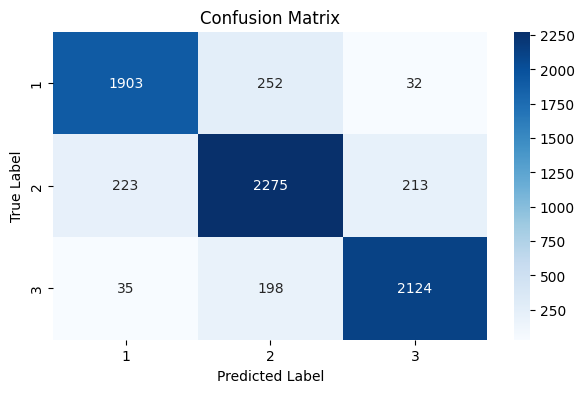

In [19]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

y_pred = clf.predict(X_test)

# Print classification report
print(classification_report(y_test, y_pred))

# Print accuracy score
print("Accuracy: ", accuracy_score(y_test, y_pred))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(7, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=[1, 2, 3], yticklabels=[1, 2, 3])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

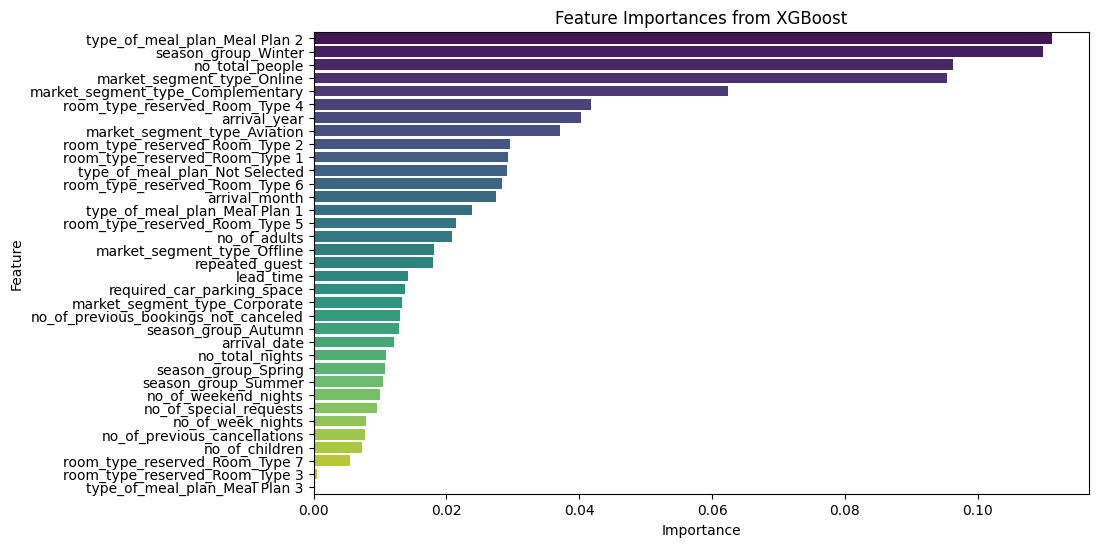

In [20]:
importances = clf.feature_importances_
feat_importances = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feat_importances = feat_importances.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feat_importances, palette='viridis')
plt.title('Feature Importances from XGBoost')
plt.show()

In [21]:
from sklearn.model_selection import GridSearchCV

xgb_model = XGBClassifier(objective='multi:softmax', random_state=42)


param_grid = {
    'n_estimators': [100, 200, 500],
    'max_depth': [10, 20, 30],
    'scale_pos_weight': [1, 2, 3]
}
grid_search = GridSearchCV(xgb_model, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_resampled, y_resampled)

print(grid_search.best_params_)

best_model = grid_search.best_estimator_
y_pred_best = best_model.predict(X_test)

print(confusion_matrix(y_test, y_pred_best))
print(classification_report(y_test, y_pred_best))
print("Accuracy: ", accuracy_score(y_test, y_pred_best))

c:\Users\pacie\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\core.py:160: UserWarning: [13:36:16] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "scale_pos_weight" } are not used.

  warnings.warn(smsg, UserWarning)


{'max_depth': 20, 'n_estimators': 100, 'scale_pos_weight': 1}
[[1919  248   20]
 [ 212 2304  195]
 [  24  196 2137]]
              precision    recall  f1-score   support

           0       0.89      0.88      0.88      2187
           1       0.84      0.85      0.84      2711
           2       0.91      0.91      0.91      2357

    accuracy                           0.88      7255
   macro avg       0.88      0.88      0.88      7255
weighted avg       0.88      0.88      0.88      7255

Accuracy:  0.8766368022053757
